In [9]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [10]:
mnist = loadmat("mnist")
mnsit_train = mnist['train']
mnsit_test = mnist['test']

<font color='green'>
Choosing data that are related to  8 and 3 :
</font>

In [16]:
Train_Data = mnsit_train[(mnsit_train[: , -1] == 3.0) | (mnsit_train[: , -1] == 8.0)]
Test_Data =  mnsit_test[(mnsit_test[: , -1] == 3.0) | (mnsit_test[: , -1] == 8.0)]

<font color='green'>
Separating x and y :
</font>

In [12]:
#separate x and y in train data
X_Train_without_intercept = Train_Data[ : , :-1]
Y_Train_not_NegativePositiveOne = Train_Data[ : , -1]

#separate x and y in test data
X_Test_without_intercept = Test_Data[ : , :-1]
Y_Test_not_NegativePositiveOne = Test_Data[ : , -1]

<font color='green'>
Add intercept (x(0) = 1) and  turn 3 and 8 to -1 and +1:
</font>

In [17]:
### train data ###

# add x0 = 1 to all x rows
number_of_rows = len(Train_Data)
intercept = np.ones(number_of_rows)
X_Train = np.c_[intercept , X_Train_without_intercept]

# change 3 to NegatibeOne and 8 to PositiveOne
Y_Train = Y_Train_not_NegativePositiveOne.copy()
Y_Train[Y_Train == 3] = -1
Y_Train[Y_Train == 8] = 1

### test data ### 

# add x0 = 1 to all x rows
number_of_rows = len(Test_Data)
intercept = np.ones(number_of_rows)
X_Test = np.c_[intercept , X_Test_without_intercept]

# change 3 to NegatibeOne and 8 to PositiveOne
Y_Test = Y_Test_not_NegativePositiveOne.copy()
Y_Test[Y_Test == 3] = -1
Y_Test[Y_Test == 8] = 1

<font color='green'>
define functions for prediction and cost function :
</font>

In [23]:
def predict(x,w):

    prediction = np.array(x @ w)
    # implemention of sign
    turn_to_plusOne = prediction >= 0
    truen_to_minusOne = prediction < 0
    
    prediction[turn_to_plusOne] = 1
    prediction[truen_to_minusOne] = -1
    return prediction

def costfunction(w,x,y):
    cost = 0
    
    misclassifiedItems = predict(x,w) != y
   
    x = x[misclassifiedItems]
    
    y = y[misclassifiedItems]
    cost = - ( ( ( x @ w ).T @ y) )
    return cost

<font color='green'>
implement stochastic perceptron :
</font>

In [18]:
def Stochastic_Perceptron(x,y,learning_rate = 0.001) :

    #initialization
    w = np.zeros(len(x[0]))
    it = 0
    
    iteratin_lst = []
    number_of_True_assigning_lst = []

    while not np.all( f(x,w) == y ):

        it = it + 1
        i = it % len(x)
        if f(x[i].T , w) != y[i]:
            w = w + learning_rate * x[i] * y[i] 

        #storing iteration and accuracy for plottiong them 
        if it % 10000 == 0:
            iteratin_lst.append(it)
            number_of_True_assigning_lst.append(sum(f(x,w) == y))

    return w , iteratin_lst , number_of_True_assigning_lst

w , iteratin ,  number_of_True_assigning =  Stochastic_Perceptron(X_Train,Y_Train)

<font color='green'>
plotting accuracy in every 1000 iteration :
</font>

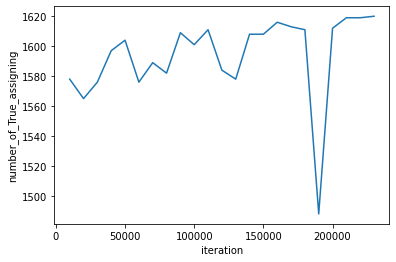

In [21]:
plt.xlabel("iteration")
plt.ylabel("number_of_True_assigning")
plt.plot(iteratin , number_of_True_assigning)

<font color='green'>
defining accuracy function:
</font>

In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

<font color='green'>
cost function and accuracy for both train and test data:
</font>

In [22]:
print("cost on Train Data : ",costfunction(w,X_Train , Y_Train))
print("cost on Test Data : ",costfunction(w,X_Test , Y_Test))

misclassification_percentage_on_Train_data = ( sum(f(X_Train , w) == Y_Train) / len(Y_Train) ) * 100
misclassification_percentage_on_Test_data = ( sum(f(X_Test , w) == Y_Test) / len(Y_Test) ) * 100
print("misclassification_percentage_on_Train_data : ", misclassification_percentage_on_Train_data , "\n" ,"misclassification_percentage_on_Test_data : " ,misclassification_percentage_on_Test_data )

cost on Train Data :  -0.0
cost on Test Data :  1.008375840061521
misclassification_percentage_on_Train_data :  100.0 
 misclassification_percentage_on_Test_data :  94.72295514511873
